<a href="https://colab.research.google.com/github/Jonathan-Putra-Satya/Test/blob/main/UAS_AlgoPro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== MULAI GAME SCIENCE QUIZ (20 SOAL ESSAY) ===

Soal 1: Gas utama penyusun atmosfer
Jawaban Anda: nitrogen
Status: Benar


Soal 2: Proses pembentukan awan
Jawaban Anda: kondensasi
Status: Benar


Soal 3: Sumber energi fosil yang berwarna hitam
Jawaban Anda: batubara
Status: Benar


Soal 4: Ilmu yang mempelajari benda langit
Jawaban Anda: astronomi
Status: Benar


Soal 5: Satuan gaya dalam SI
Jawaban Anda: newton
Status: Benar


Soal 6: Satuan tekanan dalam SI
Jawaban Anda: pascal
Status: Benar


Soal 7: Elemen paling melimpah di alam semesta
Jawaban Anda: hidrogen
Status: Benar


Soal 8: Organ pemompa darah
Jawaban Anda: jantung
Status: Benar


Soal 9: Benda langit yang memantulkan cahaya Matahari
Jawaban Anda: bintang
Status: Salah
Jawaban yang benar adalah: Bulan


Soal 10: Gelombang yang tidak membutuhkan medium
Jawaban Anda: vakum
Status: Benar


Soal 11: Efek pemanasan atmosfer karena gas tertentu
Jawaban Anda: efek rumah kaca
Status: Benar


Soal 12: Proses perpindahan panas tan

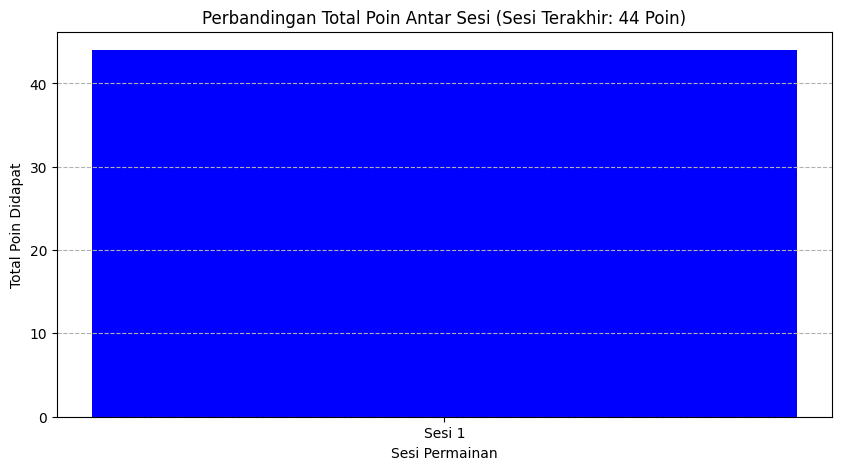


--- SELESAI ---
Apakah Anda ingin bermain lagi? (Ya/Tidak): ya


=== MULAI GAME SCIENCE QUIZ (20 SOAL ESSAY) ===

Soal 1: Ilmuwan yang menemukan hukum gravitasi
Jawaban Anda: isaac tangis
Status: Salah
Jawaban yang benar adalah: Newton


Soal 2: Reaksi penggabungan inti atom
Jawaban Anda: l
Status: Salah
Jawaban yang benar adalah: Fusi


Soal 3: Proses tumbuhan membuat makanan
Jawaban Anda: fotosintesos
Status: Salah
Jawaban yang benar adalah: Fotosintesis


Soal 4: Alat ukur suhu
Jawaban Anda: termometer
Status: Salah
Jawaban yang benar adalah: Thermometer


Soal 5: Molekul pembawa informasi genetik
Jawaban Anda: dna
Status: Benar


Soal 6: Bintang yang menjadi pusat tata surya
Jawaban Anda: matahari
Status: Benar


Soal 7: Proses naiknya air tanah ke batang tumbuhan
Jawaban Anda: klorofil
Status: Salah
Jawaban yang benar adalah: Kapilaritas


Soal 8: Elemen paling melimpah di alam semesta
Jawaban Anda: hidrogen
Status: Benar


Soal 9: Satuan gaya dalam SI
Jawaban Anda: newton
Status

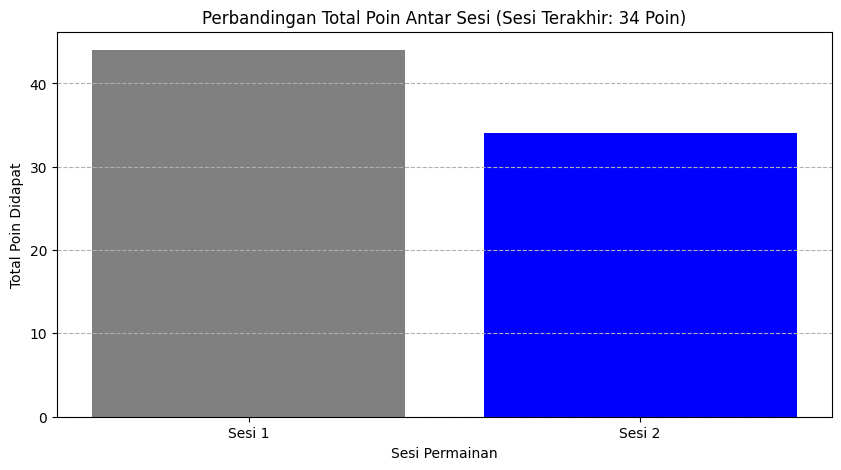


--- SELESAI ---
Apakah Anda ingin bermain lagi? (Ya/Tidak): ya


=== MULAI GAME SCIENCE QUIZ (20 SOAL ESSAY) ===

Soal 1: Zat yang dibutuhkan manusia untuk bernapas
Jawaban Anda: oksigen
Status: Benar


Soal 2: Bintang yang menjadi pusat tata surya
Jawaban Anda: matahari
Status: Benar


Soal 3: Proses pembentukan awan
Jawaban Anda: kondensasi
Status: Benar


Soal 4: Molekul pembawa informasi genetik
Jawaban Anda: dna
Status: Benar


Soal 5: Sumber energi fosil yang berwarna hitam
Jawaban Anda: batubara
Status: Benar


Soal 6: Organ tempat pertukaran oksigen dalam tubuh
Jawaban Anda: paru-paru
Status: Benar


Soal 7: Benda langit yang memantulkan cahaya Matahari
Jawaban Anda: bulan
Status: Benar


Soal 8: Cairan yang dibutuhkan tubuh untuk hidup
Jawaban Anda: air
Status: Benar


Soal 9: Ilmuwan yang menemukan hukum gravitasi
Jawaban Anda: newton
Status: Benar


Soal 10: Bagian sel tempat respirasi sel terjadi
Jawaban Anda: mitokondria
Status: Benar


Soal 11: Reaksi penggabungan inti a

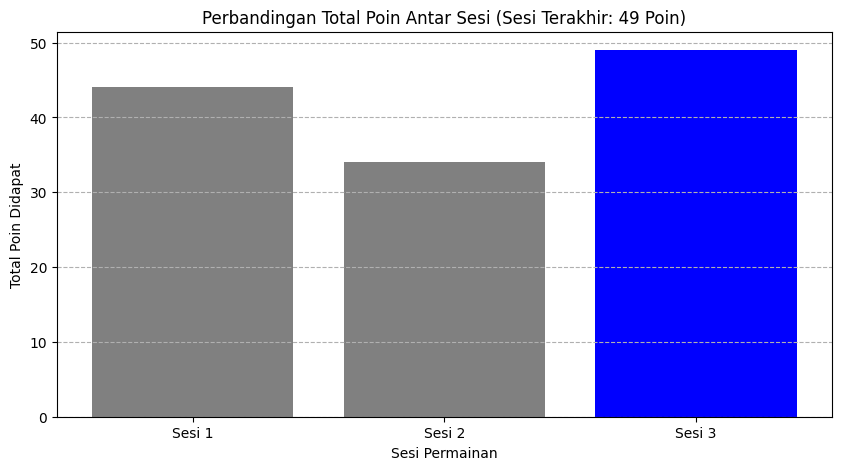


--- SELESAI ---


In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import time

def jalankan_quiz(file_soal):

    bank = pd.read_csv(file_soal)

    soal_main_df = bank.sample(20).reset_index(drop=True)
    soal_list = soal_main_df.to_dict('records')

    hasil_quiz = []

    print(f"=== MULAI GAME SCIENCE QUIZ ({20} SOAL ESSAY) ===\n")

    for i, soal in enumerate(soal_list):
        print(f"Soal {i+1}: {soal['Soal']}")
        user_answer = input("Jawaban Anda: ").strip()

        if not user_answer:
            benar = False
            print("Jawaban kosong! Otomatis dinilai Salah.")
        else:
            benar = cek_jawaban(user_answer, soal['Jawaban'])

        if benar:
            status_teks = "Benar"
        else:
            status_teks = "Salah"

        print(f"Status: {status_teks}")

        if not benar:
            print(f"Jawaban yang benar adalah: {soal['Jawaban']}")

        hasil_soal = {
            "soal": soal["Soal"],
            "jawaban_user": user_answer if user_answer else "[Kosong]",
            "jawaban_benar": soal["Jawaban"],
            "poin": soal["Poin"] if benar else 0,
            "status": "Benar" if benar else "Salah"
        }

        hasil_quiz.append(hasil_soal)
        print("\n")

    df_hasil = pd.DataFrame(hasil_quiz)
    return df_hasil


def cek_jawaban(jawaban_user, jawaban_benar):
    return jawaban_user.lower() in jawaban_benar.lower()


def tampilkan_statistik(df_hasil, riwayat_poin):
    total_poin_sekarang = df_hasil["poin"].sum()

    riwayat_poin.append(total_poin_sekarang)

    print("\n=== HASIL AKHIR ===")
    print(f"Total Benar : {df_hasil[df_hasil['status']=='Benar'].shape[0]}")
    print(f"Total Salah : {df_hasil[df_hasil['status']=='Salah'].shape[0]}")
    print(f"Total Poin  : {total_poin_sekarang}")

    jumlah_sesi = len(riwayat_poin)

    label_sesi = [f"Sesi {i+1}" for i in range(jumlah_sesi)]

    plt.figure(figsize=(10, 5))

    colors = ['gray'] * (jumlah_sesi - 1) + ['blue']

    plt.bar(label_sesi, riwayat_poin, color=colors)
    plt.title(f"Perbandingan Total Poin Antar Sesi (Sesi Terakhir: {total_poin_sekarang} Poin)")
    plt.xlabel("Sesi Permainan")
    plt.ylabel("Total Poin Didapat")
    plt.xticks(label_sesi)
    plt.grid(axis='y', linestyle='--')
    plt.show()

    return riwayat_poin

def main_game_loop(file_soal_csv):
    main_menu = True
    riwayat_poin = []

    while main_menu:
        hasil_kuis_df = jalankan_quiz(file_soal_csv)

        riwayat_poin = tampilkan_statistik(hasil_kuis_df, riwayat_poin)

        time.sleep(2)

        print("\n--- SELESAI ---")
        ulangi = input("Apakah Anda ingin bermain lagi? (Ya/Tidak): ").strip().lower()

        if ulangi != 'ya':
            main_menu = False
            print("\nTerima kasih sudah bermain! Sampai jumpa lagi.")

        print("\n" + "="*50 + "\n")

file_soal_csv = "soal_pengetahuan_sains.csv"
main_game_loop(file_soal_csv)